# week1-2: 딥러닝의 기초(1)


## 1. 로드맵
1. 회귀분석 
2. 로지스틱 
3. 심층신경망(DNN) 
4. 합성곱신경망(CNN)


## 2. Numpy
- reshape
- concatenate
- stack
- row/col vector

## 3. 회귀모형
### 3.A. 모형(Moedel) 소개

- $y_i= w_0+w_1 x_i +\epsilon_i = 2.5 + 4x_i +\epsilon_i, \quad i=1,2,\dots,n$
- ${\bf y}={\bf X}{\bf W} +\boldsymbol{\epsilon}$
- ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

### 3.B. 회귀모형 데이터 생성

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [26]:
torch.manual_seed(43052)
ones= torch.ones(100).reshape(-1,1)
x,_ = torch.randn(100).sort()
x = x.reshape(-1,1)
X = torch.concat([ones,x],axis=-1)
W = torch.tensor([[2.5],[4]])
ϵ = torch.randn(100).reshape(-1,1)*0.5
y = X@W + ϵ

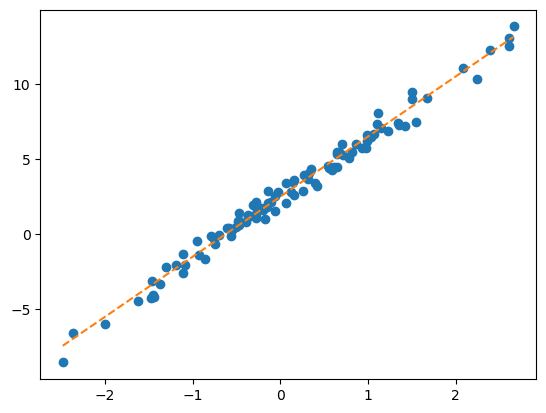

In [27]:
plt.plot(x,y,'o')
plt.plot(x,2.5+4*x,'--')

4. 회귀모형에서 학습이란?
파란점만 주어졌을때, 주황색 점선을 추정하는것. 좀 더 정확하게 말하면 given data로 $\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$를 최대한 $\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는 것.
- given data: $\big\{(x_i,y_i) \big\}_{i=1}^{n}$
- parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$
- estimated paramter: ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

다시 말해 아래 그림을 보고 `적당한` 추세선을 찾는 것

MEMO: w0=절편, w1=기울기, https://www.youtube.com/watch?v=3g-e2aiRfbU

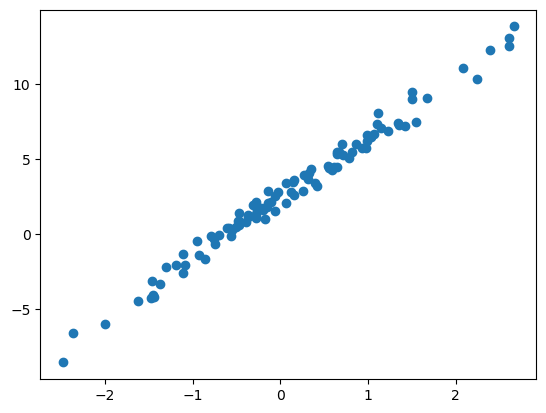

In [28]:
plt.plot(x,y,'o')

## 4. 학습방법
1. 이론적으로 추론 <- 회귀분석
2. 컴퓨터의 반복 계산을 이용하여 추론 (손실함수도입 + 경사하강법) <-- 실습할 내용
3. 전략
    - 1단계: 아무 점선이나 그어본다.
    - 2단계: 1단계에서 그은 점선보다 더 좋은 점선으로 바꾼다.
    - 3단계: 1-2단계를 반복한다.

### 6.1 1단계: 초기화

In [29]:
# 임의의 선 그리기
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

# requires_grad=True <-- 미분을 위한 옵션
## MEMO
## requires_grad=True 옵션은 해당 텐서에 대한 연산을 추적하도록 PyTorch에 지시합니다. 이는 텐서에 적용되는 모든 연산을 추적하고, 그래디언트(미분값) 계산을 가능하게 합니다.
## 이 옵션이 설정된 텐서에 대해 연산을 수행하면, PyTorch는 이를 계산 그래프에 추가합니다. 이 그래프는 텐서, 함수 및 각 연산 간의 관계를 나타냅니다. 이 그래프를 사용하여 역전파(backpropagation)를 수행하고 그래디언트를 자동으로 계산할 수 있습니다. 
## 따라서, requires_grad=True는 해당 텐서에 대한 그래디언트를 계산하려는 경우, 즉 텐서가 모델의 학습 가능한 매개변수일 경우에 설정해야 합니다. 이 옵션이 설정되지 않은 텐서에 대해서는 그래디언트가 계산되거나 저장되지 않습니다.

tensor([[-5.],
        [10.]], requires_grad=True)

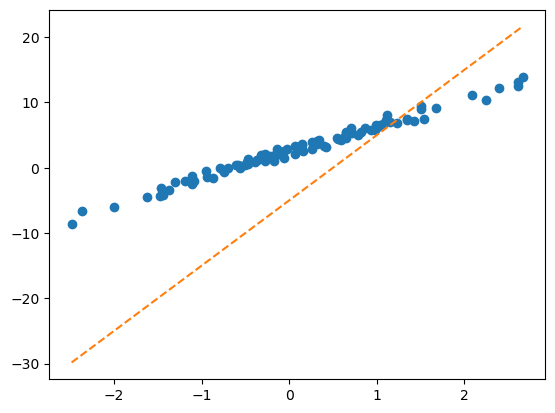

In [30]:
yhat = X@What
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')

## 6.2 2단계: 업데이트
> 2단계 = 업데이트 = 최초의 점선에 대한 ‘적당한 정도’를 판단하고 더 ’적당한’ 점선으로 업데이트 한다.

### 손실함수(loss function) 도입!
- $loss=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2 = ({\bf y}-{\bf\hat{y}})^\top({\bf y}-{\bf\hat{y}})=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$
MEMO: 그냥 툭 치면 나올정도로 숙지!

### 손실함수의 특징
- $y_i \approx \hat{y}_i$ 일수록 loss값이 작다.
- $y_i \approx \hat{y}_i$이 되도록 $(\hat{w}_0,\hat{w}_1)$을 결정하면 loss값이 작다.
- **(중요) 주황색 점선이 ‘적당할 수록’ loss값이 작다.**

In [ ]:
loss = torch.sum((y-yhat)**2)
loss

w0, w1 --> loss?
F_loss: w0,w1 -> lose 

### 우리의 목표: 이 loss(=8587.6875)을 더 줄이자.

- 궁극적으로는 아예모든 조합에 대하여 가장 작은 loss를 찾으면 좋겠다. (단계2에서 할일은 아님)
- 문제의 치환: 생각해보니까 우리의 문제는 아래와 같이 수학적으로 단순화 되었다.
    - 적당해보이는 주황색 선을 찾자 --> $loss(w_0,w_1)$를 최소로하는 --> $(w_0,w_1)$를 찾자.

### 수정된 목표: $loss(w_0,w_1)$를 최소로하는 $(w_0,w_1)$를 구하라.
- 단순한 수학문제가 되었다. 마치 $loss(w)=w^2-2w+3$를 최소화하는 $w$를 찾으라는 것과 같음.
- 즉 “적당한 선으로 업데이트 하라 = 파라메터를 학습하라 = 손실함수를 최소화 하라”
- 우리의 무기: 경사하강법, 벡터미분

## NOTE: 경사하강법 복습(?)
### 경사하강법 아이디어 (1차원)
- (step 1) 임의의 점을 찍는다.
- (step 2) 그 점에서 순간기울기를 구한다. (접선) <– 미분
- (step 3) 순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로 움직인다.
- (팁) 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 조절한다.

### 경사하강법 아이디어 (2차원)
- (step 1) 임의의 점을 찍는다.
- (step 2) 그 점에서 순간기울기를 구한다. (접평면) <– 편미분
- (step 3) 순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로 각각 움직인다.
- (팁) 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 각각 조절한다.

### loss를 줄이도록 를 개선하는 방법
- 수정값 = 원래값 - 기울어진크기(=미분계수)
    - 여기에서 $\alpha$는 전체적인 보폭의 크기를 결정한다. 즉 $\alpha$값이 클수록 한번의 update 움직이는 양 크다.

MEMO: 240306

${\bf W} \leftarrow {\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$

- 마이너스의 의미: 기울기의 부호를 보고 반대방향으로 움직여라.  
- $\frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$: 기울기의 절대값크기와 비례하여 움직이는 정도를 조정하라.  
- $\alpha$의 의미: 전체적인 보폭의 속도를 조절, $\alpha$가 크면 전체적으로 빠르게 움직인다. 다리의 길이로 비유할 수 있다.

### 리마인드
- 우리의 목표: loss=8587.6875 인데, 이걸 줄이는 것이 목표라고 했었음. 이것을 줄이는 방법이 경사하강법이다.
- 경사하강법으로 loss를 줄이기 위해서는 $\frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$의 계산이 필요한데, 이를 위해서 벡터미분이 필요하다. (loss.backward()로 하면된다)

In [32]:
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

In [34]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [35]:
What,What.grad

(tensor([[-5.],
         [10.]], requires_grad=True),
 tensor([[-1342.2521],
         [ 1188.9304]]))